C:\Users\Lukasz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


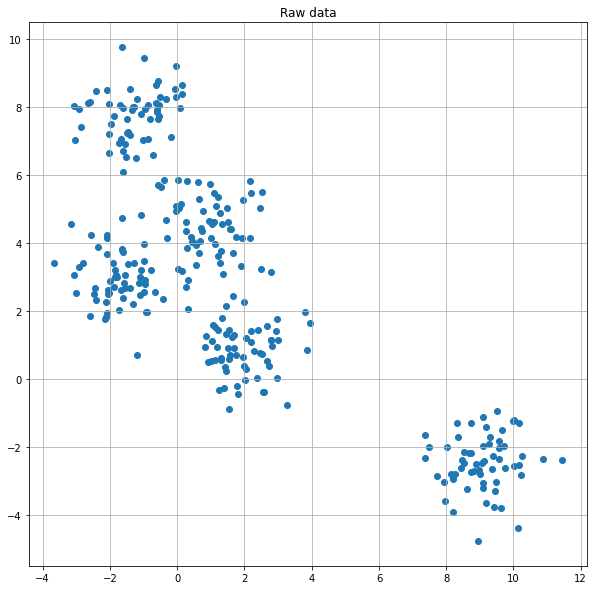

In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1])
plt.title('Raw data')
plt.grid()
plt.show()

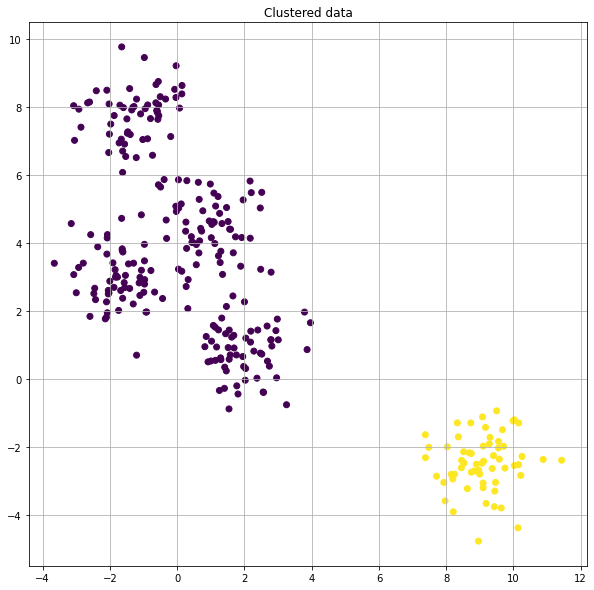

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random').fit(X)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title('Clustered data')
plt.grid()
plt.show()

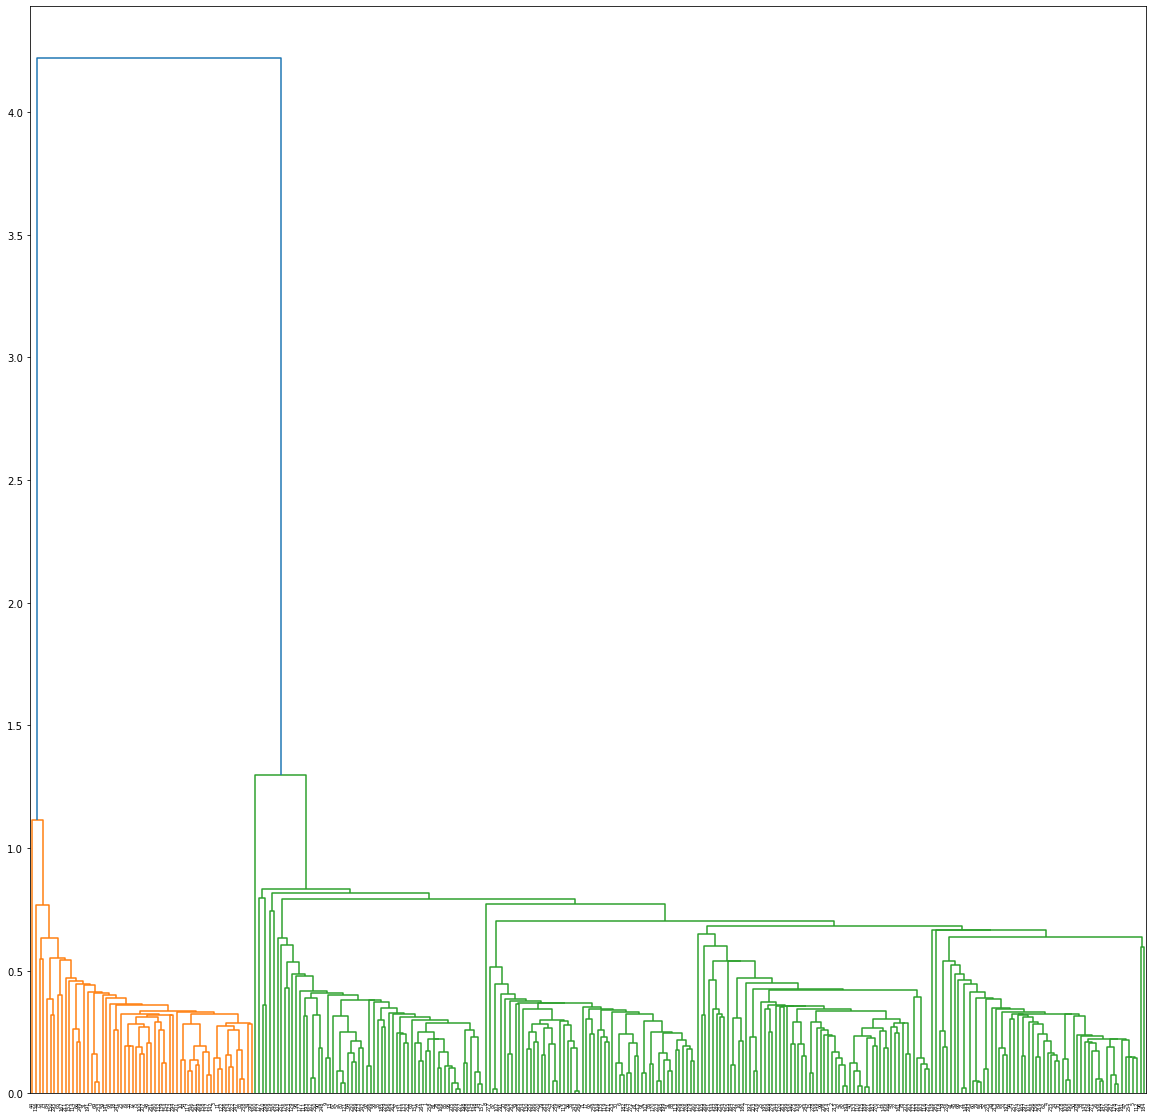

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = [20, 20])
z = linkage(X)
dn = dendrogram(z)
plt.show()

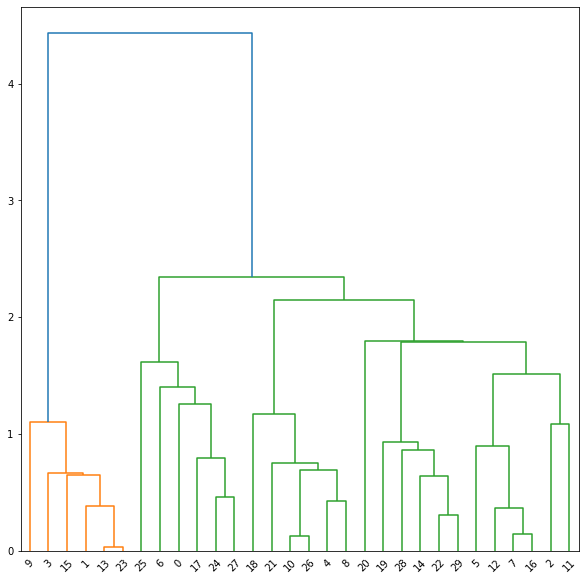

In [4]:
#We create smaller dataset to make dendrogram more legible.

X, y_true = make_blobs(n_samples=30, centers=5,
                       cluster_std=0.8, random_state=0)
plt.figure(figsize = [10, 10])
z = linkage(X)
dn = dendrogram(z)
plt.show()

In [5]:
#Agglomerative clustering

import pandas as pd
data = pd.read_csv('H:\\Studia\\Machine learning\\shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = data.iloc[:, 3:5]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


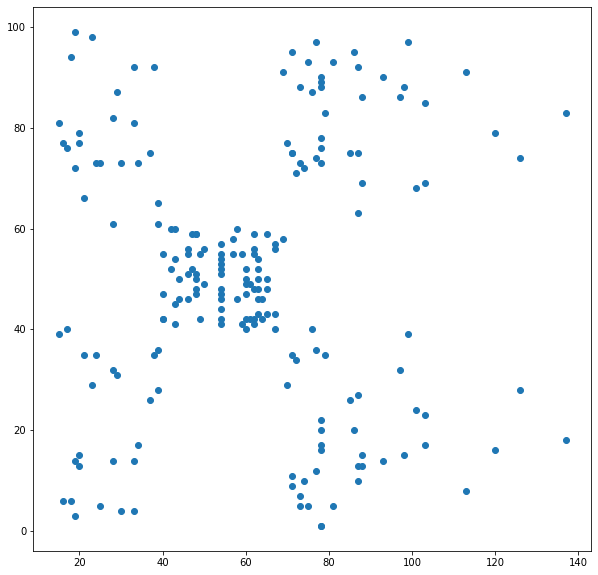

In [7]:
plt.figure(figsize = [10, 10])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.show()

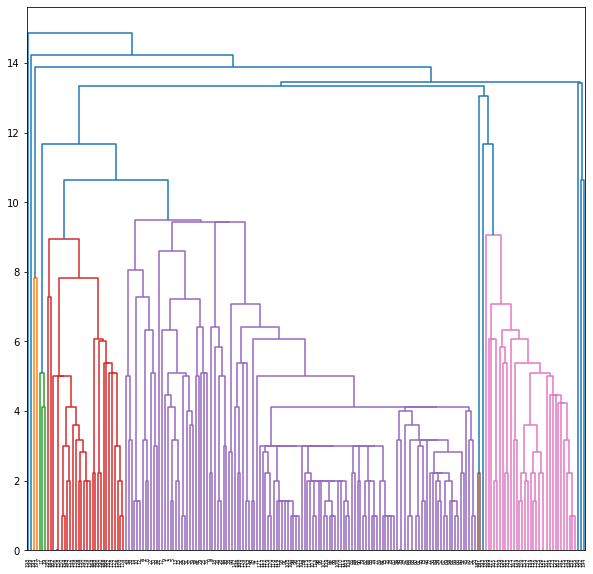

In [8]:
plt.figure(figsize = [10, 10])
z = linkage(data)
dn = dendrogram(z)
plt.show()

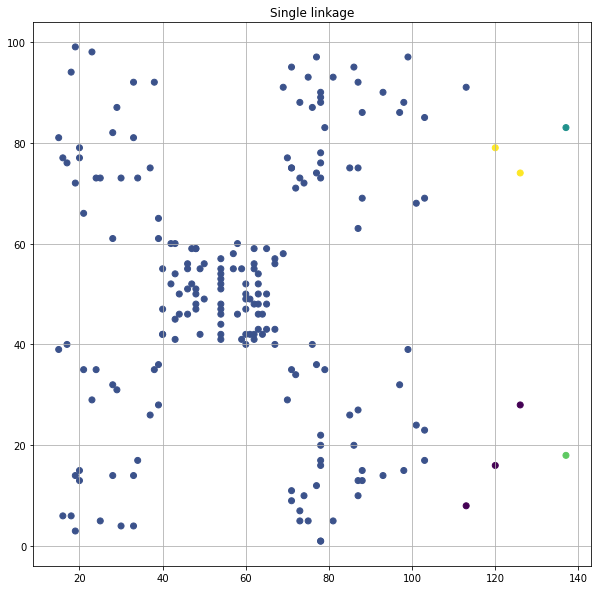

In [9]:
#We will set k as 5.

from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters = 5, linkage = 'single').fit(data)
plt.figure(figsize = [10, 10])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clus.labels_)
plt.title('Single linkage')
plt.grid()
plt.show()

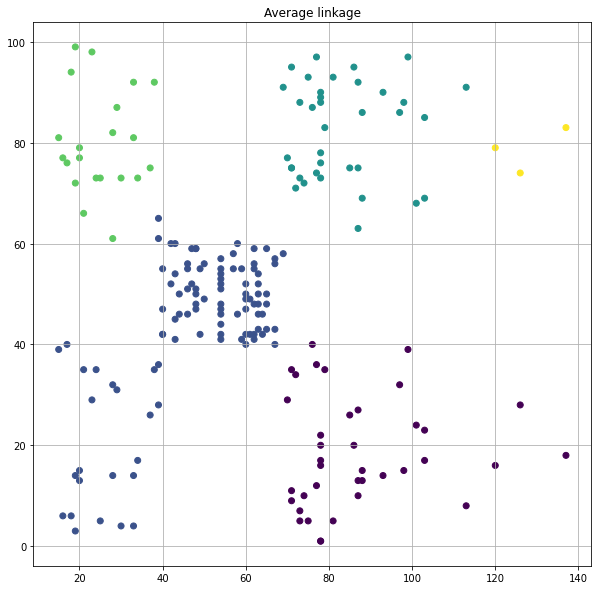

In [10]:
clus = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit(data)
plt.figure(figsize = [10, 10])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clus.labels_)
plt.title('Average linkage')
plt.grid()
plt.show()

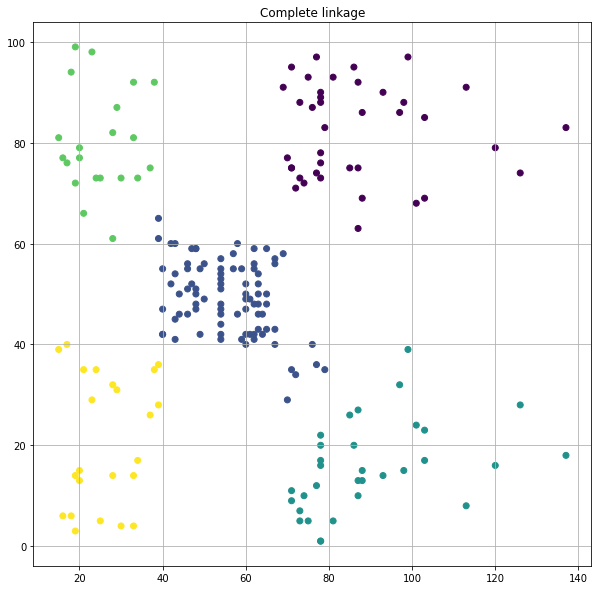

In [11]:
clus = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(data)
plt.figure(figsize = [10, 10])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clus.labels_)
plt.title('Complete linkage')
plt.grid()
plt.show()

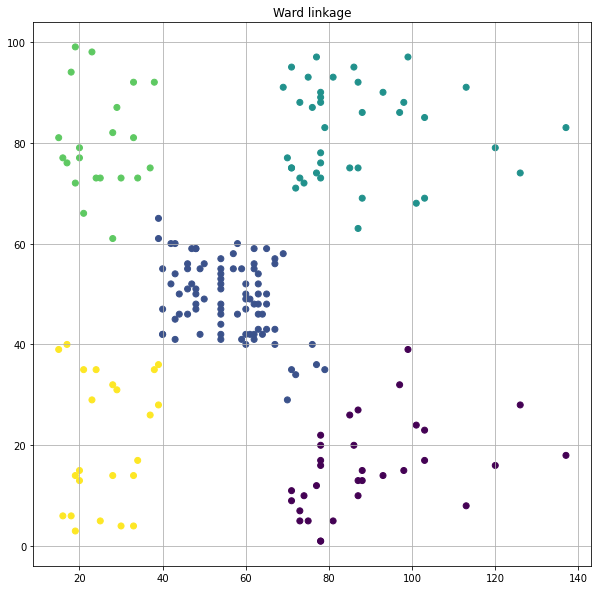

In [12]:
clus = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(data)
plt.figure(figsize = [10, 10])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = clus.labels_)
plt.title('Ward linkage')
plt.grid()
plt.show()

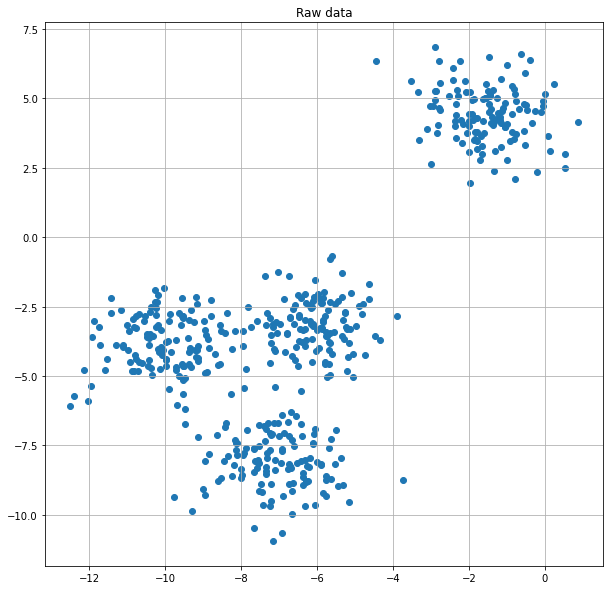

In [13]:
#It can be clearly seend that complete and Ward linkages worked best.

#Silhouette method for kmeans
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1])
plt.title('Raw data')
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 10 The average silhouette_score is : 0.33861725270668125
For n_clusters = 15 The average silhouette_score is : 0.3489224414990183


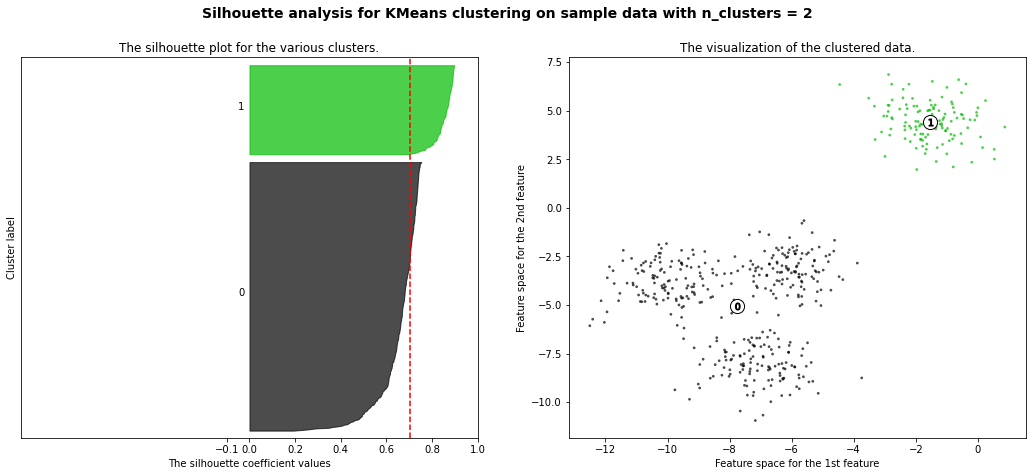

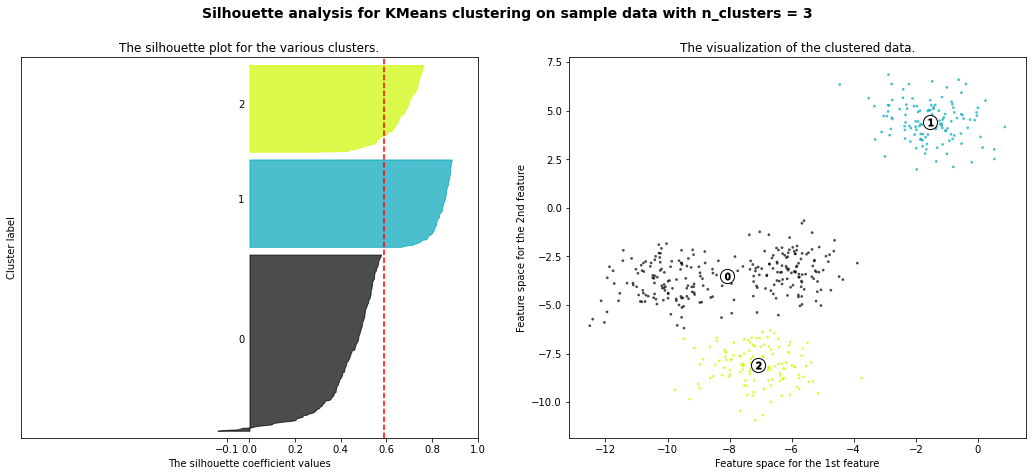

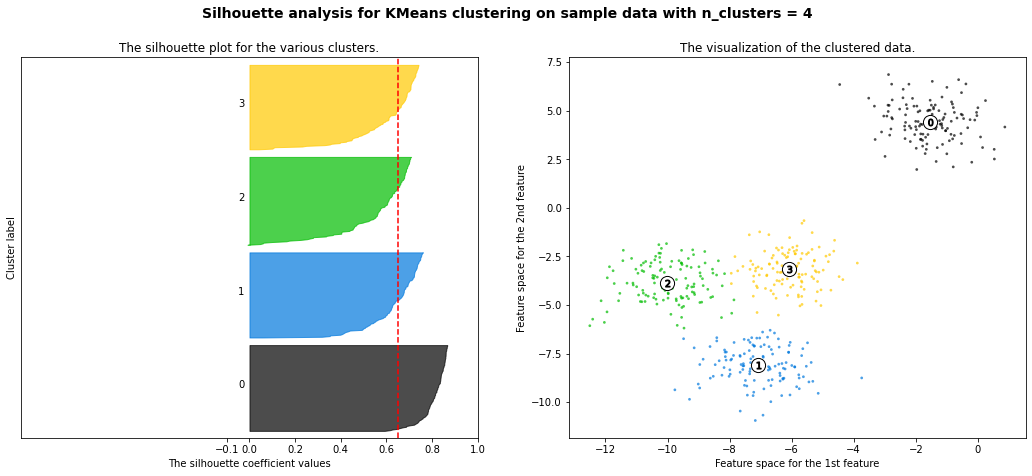

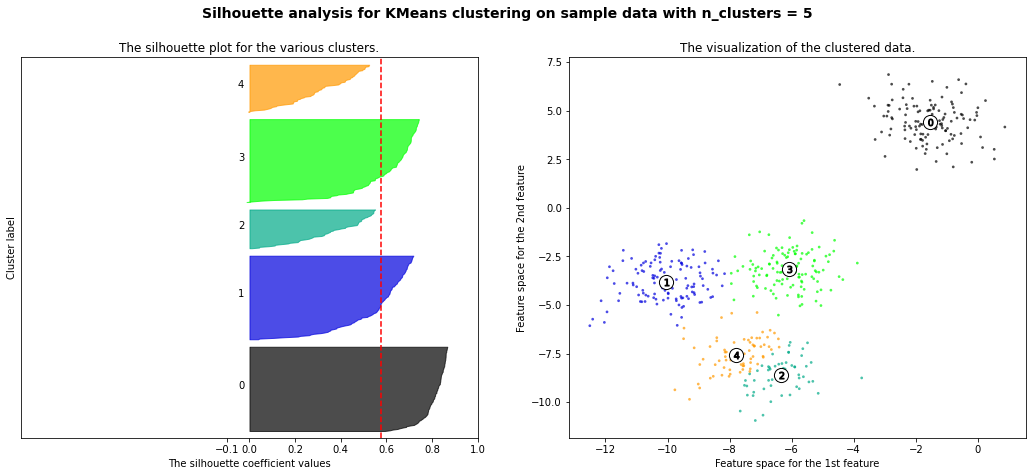

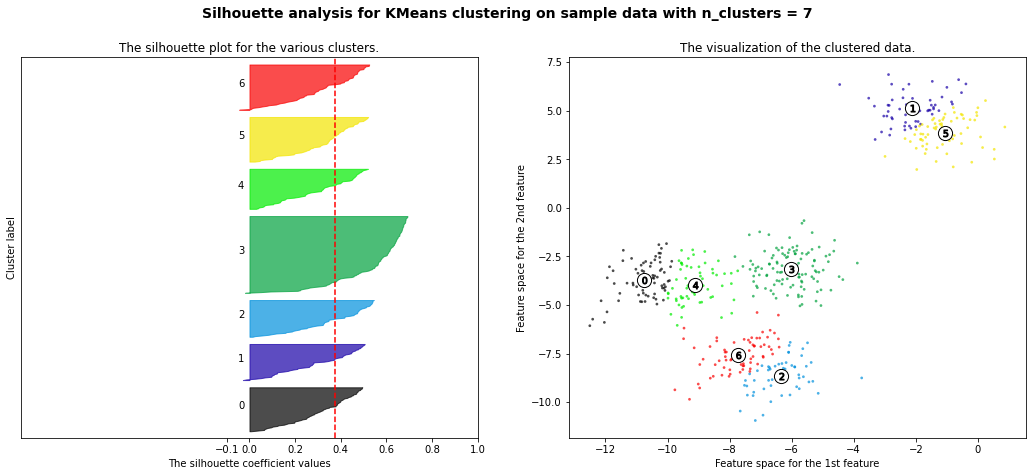

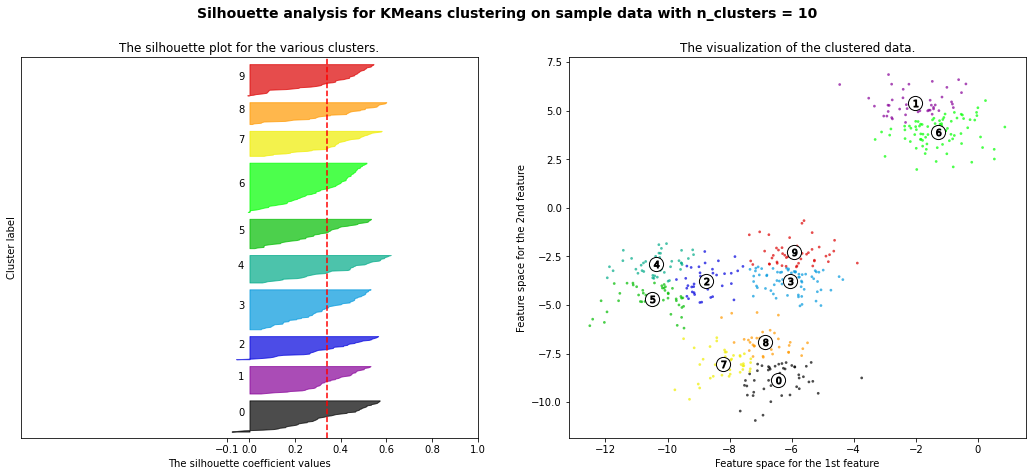

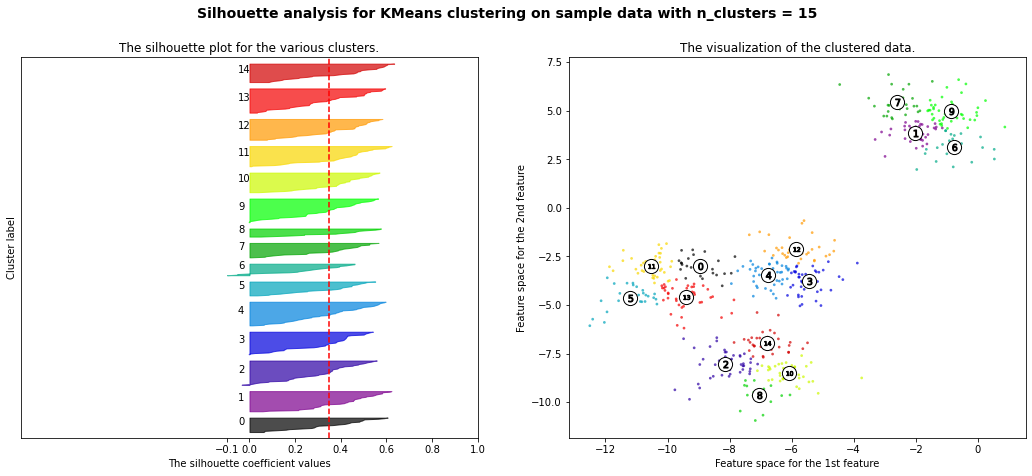

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

clustersRange = [2, 3, 4, 5, 7, 10, 15]
for n_clusters in clustersRange:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
          

In [15]:
#DBSCAN algorithm

from sklearn import datasets

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
no_structure = np.random.rand(n_samples, 2)
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

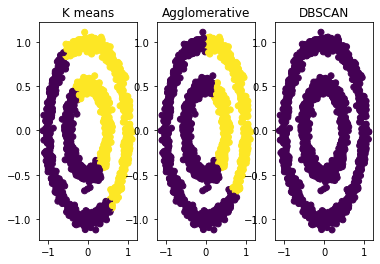

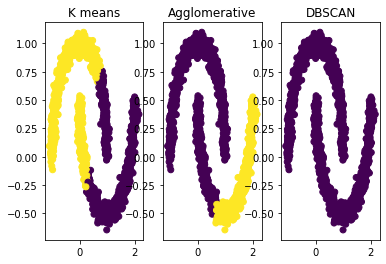

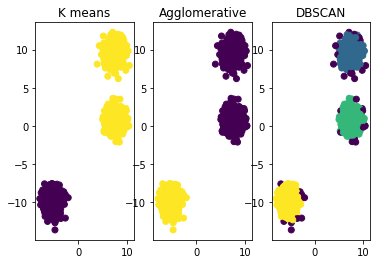

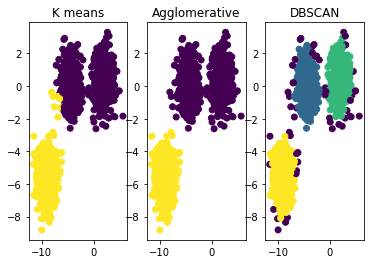

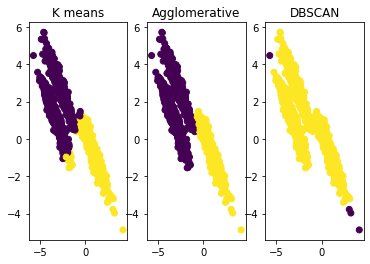

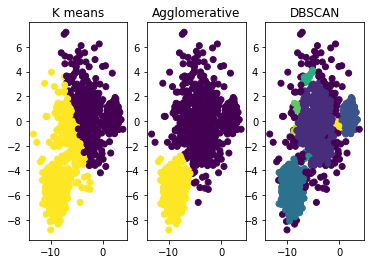

In [16]:
from sklearn.cluster import DBSCAN

sets = [noisy_circles, noisy_moons, blobs, X, X_aniso, varied]
for data in sets:
    kmeans = KMeans(n_clusters = 2).fit(data)
    agg = AgglomerativeClustering().fit(data)
    dbs = DBSCAN().fit(data)
    fig, axs = plt.subplots(1, 3)
    axs[0].set_title('K means')
    axs[0].scatter(data[:, 0], data[:, 1], c = kmeans.labels_)
    axs[1].set_title('Agglomerative')
    axs[1].scatter(data[:, 0], data[:, 1], c = agg.labels_)
    axs[2].set_title('DBSCAN')
    axs[2].scatter(data[:, 0], data[:, 1], c = dbs.labels_)

In [17]:
#PCA - ex. 1

df=pd.read_csv('H:\\Studia\\Machine learning\\usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [18]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [19]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


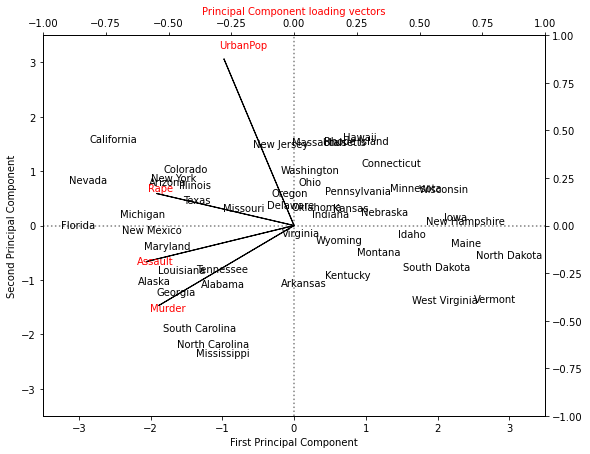

In [23]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])


In [24]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [25]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x220234467f0>,
 <a list of 4 Text major ticklabel objects>)

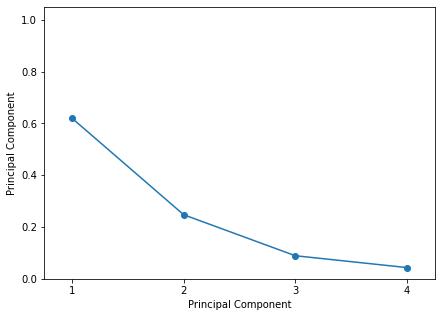

In [26]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal Component')
plt.xlim(.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x220236861f0>,
 <a list of 4 Text major ticklabel objects>)

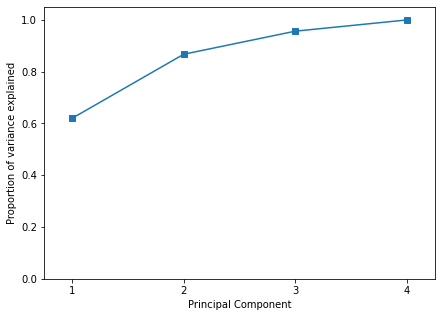

In [27]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal Component')
plt.xlim(.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1,2,3,4])

In [28]:
#2nd dataset

df2 = pd.read_csv('H://Studia//Machine learning//nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [29]:
y = pd.read_csv('H:\\Studia\\Machine learning\\nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [30]:
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [31]:
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

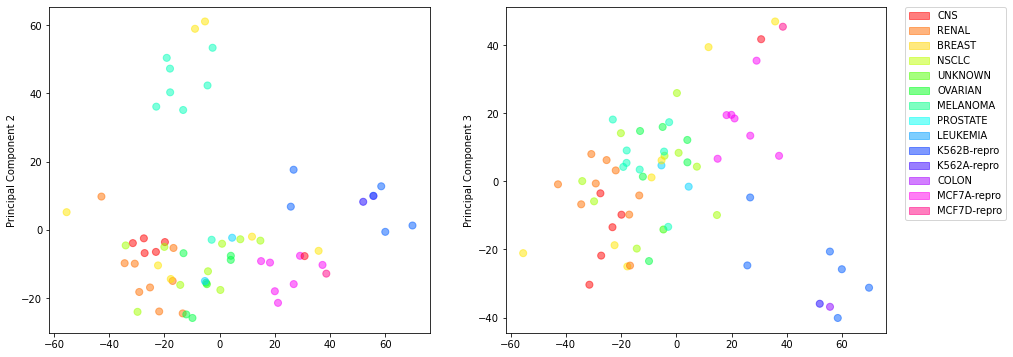

In [33]:
import matplotlib as mpl

fix, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=.5, s=50)
ax1.set_ylabel('Principal Component 2')

ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=.5, s=50)
ax2.set_ylabel('Principal Component 3')

handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    


for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [34]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),\
             pca2.explained_variance_ratio_[:5],\
             np.cumsum(pca2.explained_variance_ratio_[:5])],\
             index=['Std dev', 'Proportion of Variance', 'Cumulative Proportion'],\
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Std dev,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

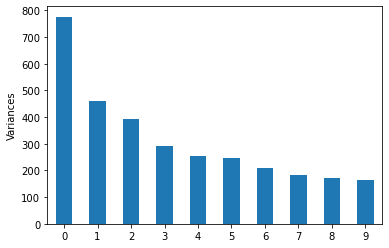

In [36]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

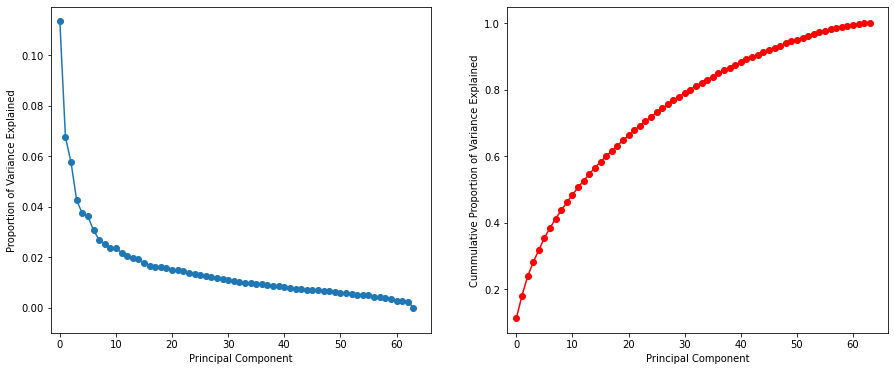

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cummulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1.65)

In [52]:
#PCA - ex. 2

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame = True)
df = data.data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [54]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,5.073075e-16,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.25)

In [61]:
covMtr = np.cov(np.transpose(X_train))
covMtr.shape

(30, 30)

In [72]:
values, vectors = np.linalg.eig(covMtr)
np.sort(values)
values

array([1.25088758e+01, 5.74222872e+00, 2.77049725e+00, 1.92208355e+00,
       1.59706269e+00, 1.25668675e+00, 6.70665725e-01, 4.92766902e-01,
       3.95879733e-01, 3.88947388e-01, 2.68390202e-01, 2.33255608e-01,
       1.90589540e-01, 1.38365068e-01, 1.00057382e-01, 8.46260164e-02,
       6.42178409e-02, 4.94612412e-02, 3.79106042e-02, 3.38346664e-02,
       1.39310125e-04, 7.50462723e-04, 1.37597861e-03, 6.76876996e-03,
       8.05713402e-03, 1.03861221e-02, 1.56644733e-02, 1.95547672e-02,
       2.35629684e-02, 2.73197404e-02])

In [74]:
pca = PCA().fit(X_train)
pca.explained_variance_

array([1.25088758e+01, 5.74222872e+00, 2.77049725e+00, 1.92208355e+00,
       1.59706269e+00, 1.25668675e+00, 6.70665725e-01, 4.92766902e-01,
       3.95879733e-01, 3.88947388e-01, 2.68390202e-01, 2.33255608e-01,
       1.90589540e-01, 1.38365068e-01, 1.00057382e-01, 8.46260164e-02,
       6.42178409e-02, 4.94612412e-02, 3.79106042e-02, 3.38346664e-02,
       2.73197404e-02, 2.35629684e-02, 1.95547672e-02, 1.56644733e-02,
       1.03861221e-02, 8.05713402e-03, 6.76876996e-03, 1.37597861e-03,
       7.50462723e-04, 1.39310125e-04])

In [75]:
pca.explained_variance_ratio_

array([4.30450219e-01, 1.97599181e-01, 9.53371964e-02, 6.61419380e-02,
       5.49574557e-02, 4.32445805e-02, 2.30786694e-02, 1.69568892e-02,
       1.36228484e-02, 1.33842954e-02, 9.23573174e-03, 8.02669474e-03,
       6.55848782e-03, 4.76136103e-03, 3.44313292e-03, 2.91211520e-03,
       2.20983757e-03, 1.70203962e-03, 1.30456391e-03, 1.16430444e-03,
       9.40115520e-04, 8.10839046e-04, 6.72910499e-04, 5.39039326e-04,
       3.57402906e-04, 2.77258737e-04, 2.32924090e-04, 4.73496022e-05,
       2.58246104e-05, 4.79388196e-06])

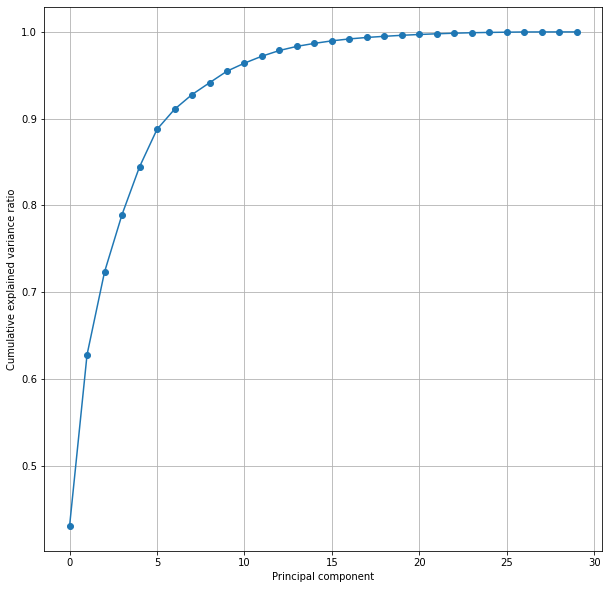

In [78]:
plt.figure(figsize = [10, 10])
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal component')
plt.ylabel('Cumulative explained variance ratio')
plt.grid()
plt.show()

In [79]:
#We can see that the first six components explain more than 90% of variance. Their eigenvalues and eigenvector are:
pca.explained_variance_[0:5]

array([12.50887577,  5.74222872,  2.77049725,  1.92208355,  1.59706269])

In [80]:
pca.components_[0:5]

array([[ 2.17697939e-01,  1.05749859e-01,  2.26440584e-01,
         2.17696347e-01,  1.51412414e-01,  2.46031479e-01,
         2.57392805e-01,  2.64662166e-01,  1.39158981e-01,
         7.41509648e-02,  1.95686208e-01, -8.76108753e-03,
         1.98652480e-01,  1.84656940e-01,  9.20567602e-03,
         1.58630345e-01,  1.37278093e-01,  1.72401736e-01,
         3.63002926e-02,  9.46591419e-02,  2.28277265e-01,
         1.04946527e-01,  2.35419073e-01,  2.20908514e-01,
         1.40223912e-01,  2.22401107e-01,  2.36298173e-01,
         2.62576510e-01,  1.35966315e-01,  1.49574971e-01],
       [-2.45315953e-01, -5.86758847e-02, -2.25503091e-01,
        -2.42000222e-01,  1.95702256e-01,  1.59655217e-01,
         4.96023214e-02, -3.69107689e-02,  1.83723401e-01,
         3.78901197e-01, -1.25493027e-01,  3.85916119e-02,
        -1.07817091e-01, -1.56111231e-01,  1.92646936e-01,
         2.10801583e-01,  1.51321928e-01,  1.09064973e-01,
         1.36476398e-01,  2.44318999e-01, -2.20450270e-

In [85]:
X = pd.DataFrame(PCA(n_components = 6).fit_transform(X_train))
X.head()

,0,1,2,3,4,5
0,-2.533527,-0.284377,1.652640,-1.532446,-1.318785,1.649641
1,0.413288,3.623123,0.589708,1.648463,-1.304477,-2.672139
2,-1.849007,1.669760,0.274103,-1.333067,2.419516,0.934998
3,-2.277046,0.883690,-0.323584,-0.382224,-1.459511,-0.324063
4,-2.942659,-0.537803,-0.726587,0.543112,0.585428,-0.482195


In [86]:
X.describe()

,0,1,2,3,4,5
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-5.915977e-17,-8.548196e-17,-1.052888e-16,-2.866773e-17,-4.541229e-17,7.088748e-17
std,3.536789e+00,2.396295e+00,1.664481e+00,1.386392e+00,1.263749e+00,1.121020e+00
min,-5.791067e+00,-8.468871e+00,-3.967642e+00,-5.135638e+00,-4.416156e+00,-3.367078e+00
25%,-2.678476e+00,-1.478682e+00,-1.060642e+00,-9.239656e-01,-6.073732e-01,-7.166584e-01
50%,-1.190819e+00,-1.527400e-01,-1.945327e-01,-9.997518e-02,-4.466252e-02,-5.683743e-02
75%,2.647514e+00,1.184615e+00,8.839841e-01,7.602779e-01,5.952978e-01,6.518470e-01
max,1.174090e+01,1.041140e+01,9.993455e+00,5.168321e+00,5.024453e+00,4.599147e+00
